# Introduction to Regression with Neural Networks in Tensorflow

There are many defenition for regression problems but in our case, we're going to simplify it: predicting a numerical variable based on some other combinations of variables, even shorter... predicting a number


In [ ]:
# Import tendorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


### Creating data to view and fit

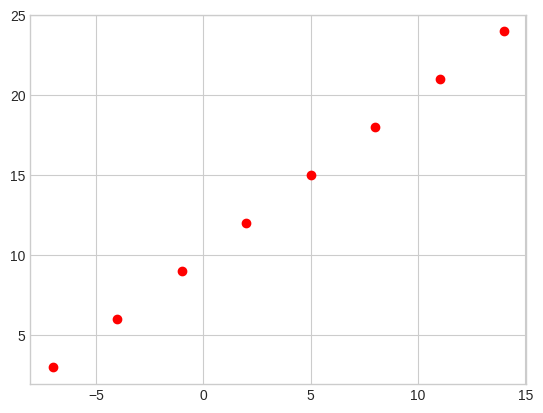

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create the features (X)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y, c="r");

In [ ]:
X + 10 == y

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Inout and outputs shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["Bedroom", "Bathroom", "Garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Bedroom', b'Bathroom', b'Garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim # zero dimentions so no shape

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape , output_shape

(TensorShape([]), TensorShape([]))

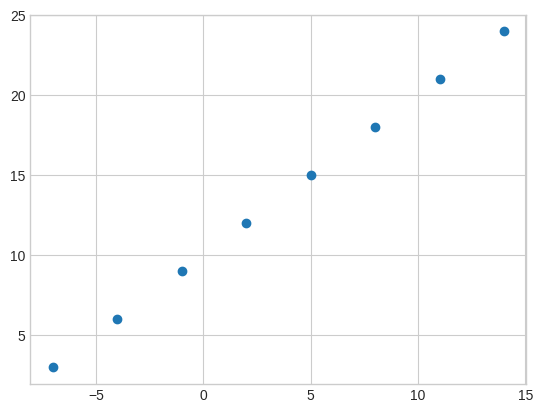

In [ ]:
plt.scatter(X, y);

## Steps in modeling with TensorFlow

1. **Creating a model** - defing the inpur and ouputs layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model** - define the loss function (in other words, the function that tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning ) and the evaluation matrcs(what we can use to interpret the performance of our model).

3. **Fitting a model** - letting the midel try to find the patterns between X and y (Features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # 1 for telling the model to compare the (X and y)s data 1 by 1 X[0], y[0]
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,# mae is short for Mean absolute error)
              optimizer=tf.keras.optimizers.SGD(),#  SGD is short for stochastic gradient descent
              #we can also say optimizer="sgd"
              metrics = ["mae"])
# 3. Fit the model
model.fit(X, y, epochs=5)


Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_11' (type Sequential).
    
    Input 0 of layer "dense_15" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_11' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=True
      • mask=None


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # 1 for telling the model to compare the (X and y)s data 1 by 1 X[0], y[0]
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,# mae is short for Mean absolute error)
              optimizer=tf.keras.optimizers.SGD(),#  SGD is short for stochastic gradient descent
              #we can also say optimizer="sgd"
              metrics = ["mae"])
# 3. Fit the model
model.fit(X[:, tf.newaxis], y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 696ms/step - loss: 14.4404 - mae: 14.4404
Epoch 2/5
1/1 [==============================] - 0s 41ms/step - loss: 14.3079 - mae: 14.3079
Epoch 3/5
1/1 [==============================] - 0s 26ms/step - loss: 14.1754 - mae: 14.1754
Epoch 4/5
1/1 [==============================] - 0s 27ms/step - loss: 14.0429 - mae: 14.0429
Epoch 5/5
1/1 [==============================] - 0s 30ms/step - loss: 13.9104 - mae: 13.9104


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try an make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 159ms/step


array([[-1.5424992]], dtype=float32)

In [ ]:
y_pred = model.predict(X)

1/1 [==============================] - 0s 30ms/step


In [ ]:
y_pred + 17

array([[17.705734],
       [17.424706],
       [17.143677],
       [16.862648],
       [16.581617],
       [16.300589],
       [16.01956 ],
       [15.73853 ]], dtype=float32)

In [ ]:
y[tf.where(X == 5)]

InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} Expected begin, end, and strides to be 1D equal size tensors, but got shapes [1,1,1], [1,1,1], and [1] instead. [Op:StridedSlice] name: strided_slice/

# Improving a model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** here we might add more layers, increase the number of hidden units (all called neurons) whithin each of the hidden layers, change the acrivation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more example to learn from)

## Common ways to improve a deep Model:
* Adding layers
* Increase the number of hidden units
* Change the activation function
* Change the optimization function
* Change the learning rate (The most important)
* Fitting on more data

In [ ]:
import time

In [ ]:
# Let's rebuild our model
tf.random.set_seed(42)
start_time = time.time()
# 1. Create the model again
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
            metrics = ["mae"])

# 3. Fit the model (This time we'll train for longer)
model.fit(X[:, tf.newaxis], y, epochs=100)

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Epoch 1/100
1/1 [==============================] - 1s 604ms/step - loss: 14.2655 - mae: 14.2655
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 14.1330 - mae: 14.1330
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 14.0005 - mae: 14.0005
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 13.8680 - mae: 13.8680
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 13.7355 - mae: 13.7355
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 13.6030 - mae: 13.6030
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 13.4705 - mae: 13.4705
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 13.3380 - mae: 13.3380
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 13.2055 - mae: 13.2055
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 13.0730 - mae: 13.0730
Epoch 11/100
1/1 [==============================

In [ ]:
# Remind ourselves of the ata
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our models predictions has improved
y_preds_2 = model.predict(X)
y_preds_2, model.predict([17])

1/1 [==============================] - 0s 115ms/step


(array([[-11.056529 ],
        [ -5.9376597],
        [ -0.8187903],
        [  4.300079 ],
        [  9.418948 ],
        [ 14.537818 ],
        [ 19.656687 ],
        [ 24.775557 ]], dtype=float32),
 array([[29.894424]], dtype=float32))

In [ ]:
plt.style.use("seaborn-v0_8-whitegrid")

1/1 [==============================] - 0s 48ms/step


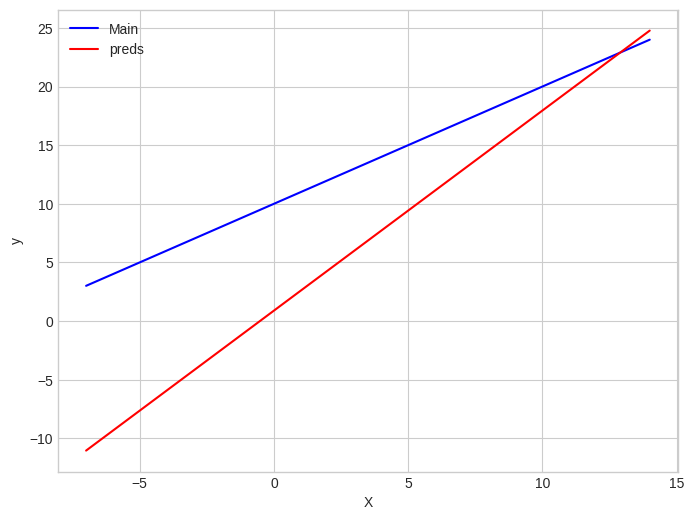

In [ ]:
def plotter(X, y, model=None):
  fig, ax= plt.subplots(figsize=(8,6))
  ax.plot(X, y, c="b", label="Main")
  if model:
    ax.plot(X, model.predict(X), c="r", label="preds")
  ax.set_xlabel("X")
  ax.set_ylabel("y")
  ax.legend();

plotter(X, y, model)

### Improving model even more:

In [ ]:
# let's  see if we can make another to improve our model
tf.random.set_seed(42)
# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = "mae",
              optimizer = tf.optimizers.SGD(lr = 0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X[:, tf.newaxis], y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 987ms/step - loss: 13.8899 - mae: 13.8899
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 13.3488 - mae: 13.3488
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 12.8087 - mae: 12.8087
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 12.2647 - mae: 12.2647
Epoch 5/100
1/1 [==============================] - 0s 31ms/step - loss: 11.7119 - mae: 11.7119
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 11.1491 - mae: 11.1491
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 10.5714 - mae: 10.5714
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 9.9700 - mae: 9.9700
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 9.3392 - mae: 9.3392
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 8.6732 - mae: 8.6732
Epoch 11/100
1/1 [==============================] - 0s

1/1 [==============================] - 0s 419ms/step


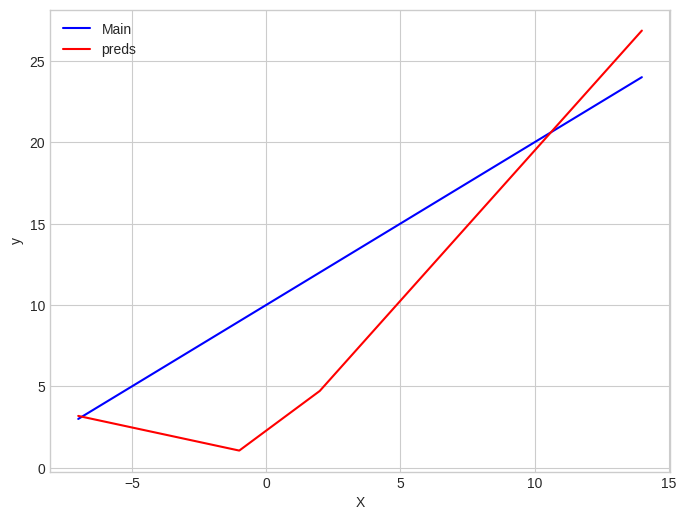

In [ ]:
plotter(X, y, model)

In [ ]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's try to make a prediction
model.predict([17])

1/1 [==============================] - 0s 73ms/step


array([[32.398163]], dtype=float32)

**The reason that the prediction is that bad is that it's overfitting the data**

In [ ]:
# let's  see if we can make another to improve our model
tf.random.set_seed(42)
# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = "mae",
              optimizer = tf.optimizers.Adam(lr=0.001),
              metrics=["mae"])

# 3. Fit the model
model.fit(X[:, tf.newaxis], y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 579ms/step - loss: 14.0872 - mae: 14.0872
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 13.9997 - mae: 13.9997
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 13.9122 - mae: 13.9122
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 13.8247 - mae: 13.8247
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 13.7372 - mae: 13.7372
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 13.6497 - mae: 13.6497
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 13.5624 - mae: 13.5624
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 13.4751 - mae: 13.4751
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 13.3881 - mae: 13.3881
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 13.3006 - mae: 13.3006
Epoch 11/100
1/1 [==============================

## Evaluating a model performance

In practice, a typical workflow you'll go through when building neural networks is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it ->
evaluate it-> tweak a model -> fit it -> evaluate it -> fit it...
```

When it comes to evaluation... there are 32 words you should memorize:

> "Visualize, Visualize, Visualize"

It's a god idea to visualize:
* The data - what data are we working with? WHat does it look like?
*The model itself = What does out model look like?
* The training of a model =- how does a model perform while it learns?
* The predictions of the model - how do the prediction of the midel line up againts the ground truth? (the original labels)

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

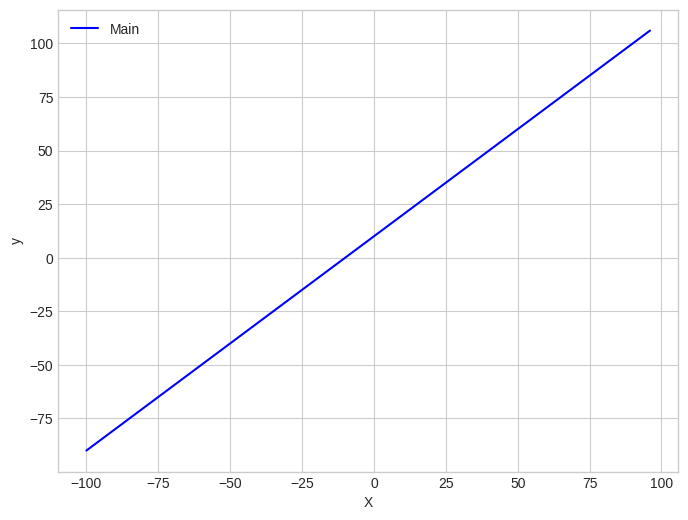

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plotter(X, y)

### The 3 sets...

* Training set - the model learns rom this data, which is typically 70-80% of the total data you have
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data availible.
* Test set - the model gets avaluated on this data to test what it has learned, this set is tyupically 10-15% of the total data avalible

In [ ]:
# WE can't use the sklearn functions here
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=  0.2)


In [ ]:
# Check the length of how mant samples we have
len(X)

50

In [ ]:
# SPlit the data into train and test sets
X_train = X[:40] # First 40 training samples
y_train = y[:40] # The last 10 training sample
# The same as train_test = ---
X_test = X[40:]
# The same as test_set = ---
y_test = y[40:]

len (X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
now we've got our data in training and test sets let's visualize it again!

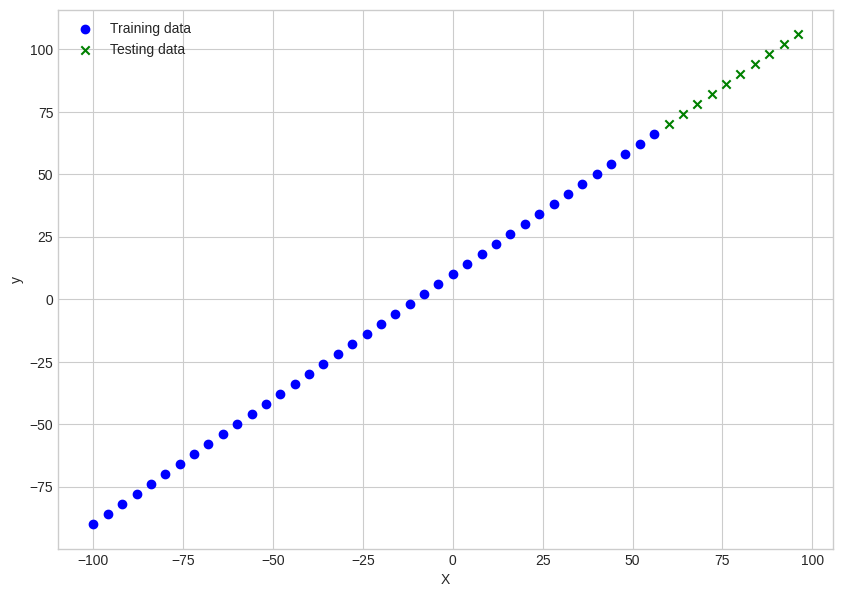

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c= "b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c = "g", label="Testing data", marker = "x")
# Show a legend
plt.legend()
plt.xlabel("X")
plt.ylabel("y");

In [ ]:
# Let's have a look at how to build a neural netork for our data...

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fitting the model
model.fit(X_train[:, tf.newaxis], y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 67.9035 - mae: 67.9035
Epoch 2/100
2/2 [==============================] - 0s 18ms/step - loss: 32.7482 - mae: 32.7482
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 9.5812 - mae: 9.5812
Epoch 4/100
2/2 [==============================] - 0s 19ms/step - loss: 11.6680 - mae: 11.6680
Epoch 5/100
2/2 [==============================] - 0s 25ms/step - loss: 13.0692 - mae: 13.0692
Epoch 6/100
2/2 [==============================] - 0s 24ms/step - loss: 7.6644 - mae: 7.6644
Epoch 7/100
2/2 [==============================] - 0s 20ms/step - loss: 13.2892 - mae: 13.2892
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 7.7652 - mae: 7.7652
Epoch 9/100
2/2 [==============================] - 0s 19ms/step - loss: 19.9090 - mae: 19.9090
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 13.7558 - mae: 13.7558
Epoch 11/100
2/2 [==============================] - 0s 1

2/2 [==============================] - 0s 10ms/step


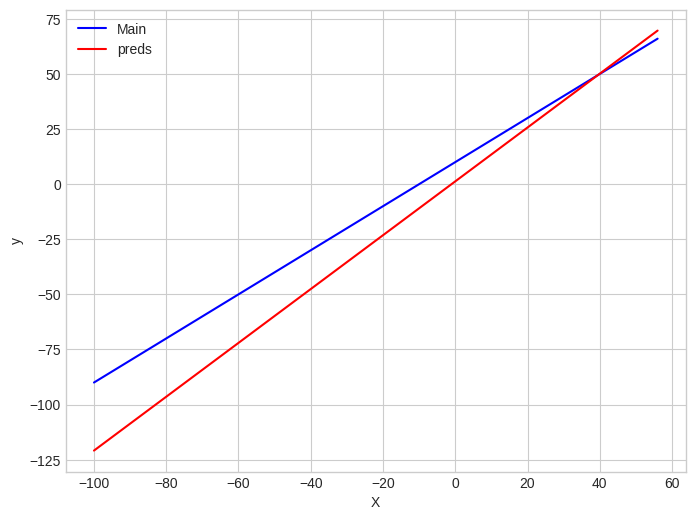

In [ ]:
plotter(X_train, y_train, model)

### Visualizing the model

In [ ]:

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:


X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Let's create a model which  builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1.Createa model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape =[1] ) # Dense means fully connected layer
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params = total number of parameters in the model.
* Trainable parametes - these are the parametes(patterns) the model can update as it trains.

When we import a model that allready learnt the patterns of the data what we might do is to freez the learnt patterns in the data sop on that case it might have some non trainable patterns that we don't want to change them and insted we make new parameters so the trainable and total parametes number may differ
* Non-trainable params - these parameters aren't updated during training (this is typicall when you bring in already learn patterns or parameters from other models during transfer learning)

Exercise: Try playing around with the number of hidden layer and see hpw it efects the result of the loss function

In [ ]:
# Let's fot our model to the training data
model.fit(X_train, y_train, epochs = 100, verbose=2)

Epoch 1/100
2/2 - 1s - loss: 12.5114 - mae: 12.5114 - 720ms/epoch - 360ms/step
Epoch 2/100
2/2 - 0s - loss: 12.6822 - mae: 12.6822 - 28ms/epoch - 14ms/step
Epoch 3/100
2/2 - 0s - loss: 11.2832 - mae: 11.2832 - 23ms/epoch - 12ms/step
Epoch 4/100
2/2 - 0s - loss: 9.5530 - mae: 9.5530 - 16ms/epoch - 8ms/step
Epoch 5/100
2/2 - 0s - loss: 10.4617 - mae: 10.4617 - 18ms/epoch - 9ms/step
Epoch 6/100
2/2 - 0s - loss: 9.6879 - mae: 9.6879 - 19ms/epoch - 10ms/step
Epoch 7/100
2/2 - 0s - loss: 8.7848 - mae: 8.7848 - 15ms/epoch - 7ms/step
Epoch 8/100
2/2 - 0s - loss: 9.0558 - mae: 9.0558 - 18ms/epoch - 9ms/step
Epoch 9/100
2/2 - 0s - loss: 19.3012 - mae: 19.3012 - 18ms/epoch - 9ms/step
Epoch 10/100
2/2 - 0s - loss: 10.4151 - mae: 10.4151 - 14ms/epoch - 7ms/step
Epoch 11/100
2/2 - 0s - loss: 8.5110 - mae: 8.5110 - 15ms/epoch - 8ms/step
Epoch 12/100
2/2 - 0s - loss: 10.9081 - mae: 10.9081 - 20ms/epoch - 10ms/step
Epoch 13/100
2/2 - 0s - loss: 7.5528 - mae: 7.5528 - 20ms/epoch - 10ms/step
Epoch 14/100

In [ ]:
y_preds_1 = model.predict(X_test)

1/1 [==============================] - 0s 148ms/step


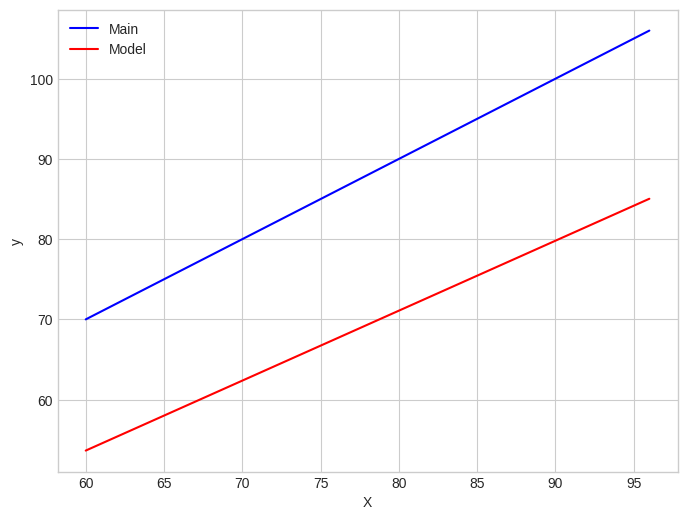

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X_test, y_test,c="b" ,label="Main")
ax.plot(X_test, y_preds_1, c="r", label="Model")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.legend();

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Get a summary of out model
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Let's create a model which  builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1.Createa model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape =[1] ) # Dense means fully connected layer
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 10)                20        
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


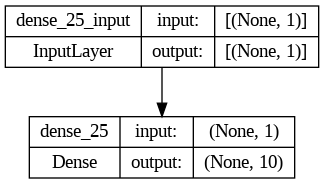

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes=True)

In [ ]:
# Let's create a model which  builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1.Createa model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape =[1], name="input_layer" ),# Dense means fully connected layer
  tf.keras.layers.Dense(1, name="Ouput_layer")
], name="model_1")
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 Ouput_layer (Dense)         (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=0)

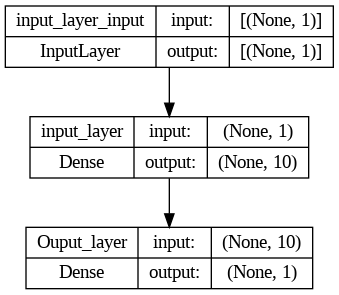

In [ ]:
plot_model(model=model, show_shapes=True)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 Ouput_layer (Dense)         (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2/2 [==============================] - 0s 6ms/step


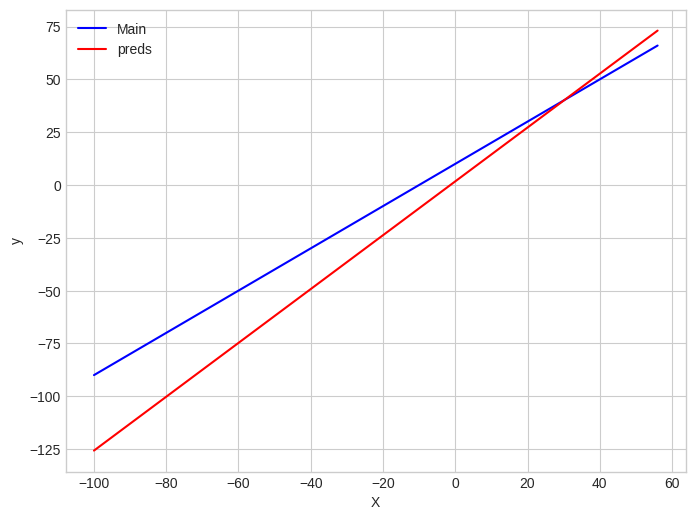

In [ ]:
plotter(X_train, y_train, model)

# Visualizing our models predictions

To Visualize predictions,  it's a good idea to plot them againts the ground truth labels

Often you'll see this in the form if `y_test` or `y_truth` versus `y_preds` (ground truth versus your model's predictions).

In [ ]:
# Make some predictions
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 33ms/step


array([[ 78.179596],
       [ 83.27728 ],
       [ 88.37498 ],
       [ 93.47266 ],
       [ 98.57034 ],
       [103.66802 ],
       [108.76572 ],
       [113.8634  ],
       [118.96108 ],
       [124.05876 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑**Note:** If you fill like you're going to reuse some kind of functionality in the future...it's a good idea to turn it into a function

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data = X_train, train_labels = y_train,
                     test_data = X_test, test_labels= y_test,
                     predictions = y_preds):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  # Plot training data  in blue
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(X_train, y_train, c= "b", label="Training data")
  # Plot test data in green
  plt.scatter(X_test, y_test, c = "g", label="Testing data", marker = "x")
  # Plot the predicitons as well
  plt.scatter(X_test, y_preds, c="r", label="Predictions")
  # Show a legend
  plt.legend()
  plt.xlabel("X")
  plt.ylabel("y");

<Figure size 1000x700 with 0 Axes>

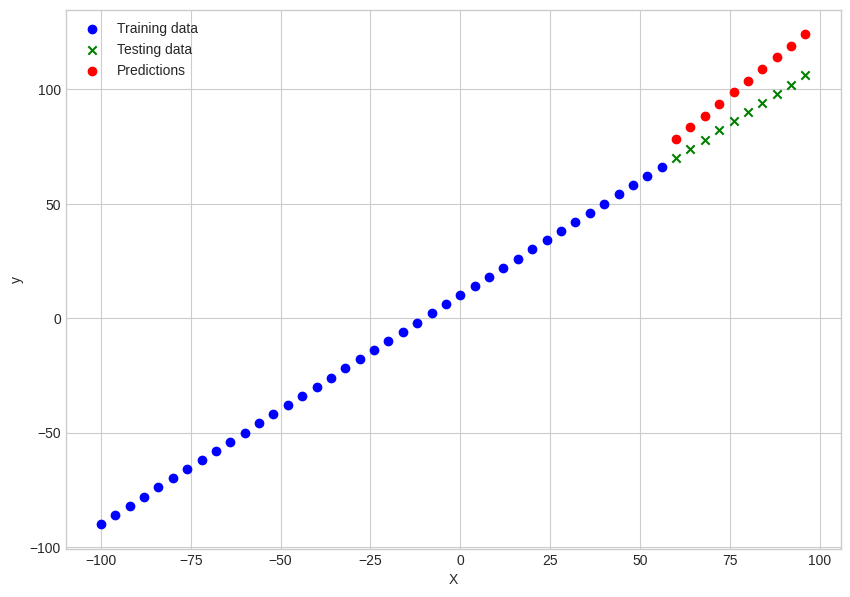

In [ ]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation matrics

Dependinf on the problem you're working on, there will be different efaluation matrics to evaluate your models performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean bsolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean squered error, "square the average errors"

In [ ]:
# Evaluate the model in the test set
model.evaluate(X_test, y_test)
# It's gonnda answer in mae since we compiled the model matrics on mae

1/1 [==============================] - 1s 1s/step - loss: 13.1192 - mae: 13.1192


[13.119180679321289, 13.119180679321289]

In [ ]:
y_preds

array([[ 78.179596],
       [ 83.27728 ],
       [ 88.37498 ],
       [ 93.47266 ],
       [ 98.57034 ],
       [103.66802 ],
       [108.76572 ],
       [113.8634  ],
       [118.96108 ],
       [124.05876 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Caluculate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_preds))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.328161, 10.544543, 10.      , 10.694531, 12.742206, 16.134418,
       20.765717, 25.863403, 30.961084, 36.05876 ], dtype=float32)>

In [ ]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 78.179596,  83.27728 ,  88.37498 ,  93.47266 ,  98.57034 ,
       103.66802 , 108.76572 , 113.8634  , 118.96108 , 124.05876 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred =tf.squeeze(y_preds))

In [ ]:
# Calculate the mean squared
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_preds))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=182.05351>

In [ ]:
# Make some functions to use MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=y_pred)


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

def plotting(X, y, model, train_size=0.2):
    # Split the data into training and testing sets
    train_size = int(len(X) * train_size)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Convert TensorFlow tensors to NumPy arrays for plotting
    X_train_np, X_test_np = X_train.numpy(), X_test.numpy()
    y_train_np, y_test_np = y_train.numpy(), y_test.numpy()

    # Make predictions using the model
    y_pred = model.predict(X_test)

    # Plot the data
    plt.figure(figsize=(10, 7))
    plt.scatter(X_train_np, y_train_np, c="b", label="Training data")
    plt.scatter(X_test_np, y_test_np, c="g", label="Test data")
    plt.scatter(X_test_np, y_pred, c="r", label="Model prediction", marker="X")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

# Example usage:
# plotting(X, y, model)


### Runnning experiments to improve our model

```Build a model -> evaluate it -> tweak it -> fit it -> evaluate it-> tweak it -> fit it...```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationship between features and labels).

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more ofa chance to find the patterns in the data

+ Machine learning practicioner:

    "Experiment", "Experiment", "Experiment"

Let's do 3 moddeling experiments

1. `model_1` - same as the original model (1 layer but trained for 100 epochs)
2. `model_2 ` - 2 layers trained for 100 epochs
3. `model_3` - 2 layers trained for 500 epochs

In [ ]:
tf.random.set_seed(42)
# Make the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape =[1])
])

# Compile the model
model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
# Fit the data
model_1.fit(X_train, y_train, epochs = 100, verbose=0)


In [ ]:
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 132ms/step - loss: 32.6032 - mae: 32.6032


[32.60322952270508, 32.60322952270508]

1/1 [==============================] - 0s 46ms/step


<Figure size 1000x700 with 0 Axes>

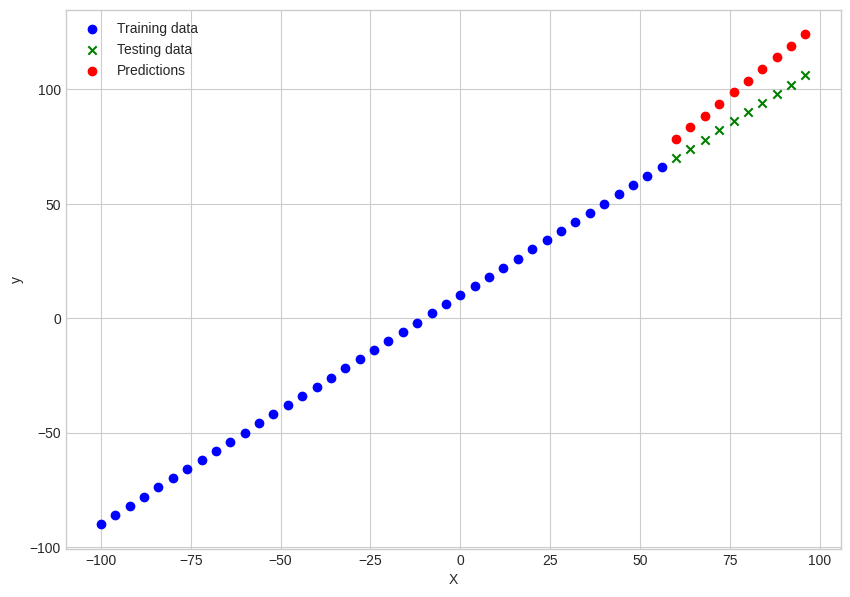

In [ ]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds)

In [ ]:
# Caluclate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=32.60323>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1075.3826>)

In [ ]:
tf.random.set_seed(42)
# Make the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
# Fit the data
model_2.fit(X_train[:, tf.newaxis], y_train, epochs = 100, verbose=0)


In [ ]:
model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 125ms/step - loss: 13.1934 - mae: 13.1934


[13.1934232711792, 13.1934232711792]

1/1 [==============================] - 0s 60ms/step


<Figure size 1000x700 with 0 Axes>

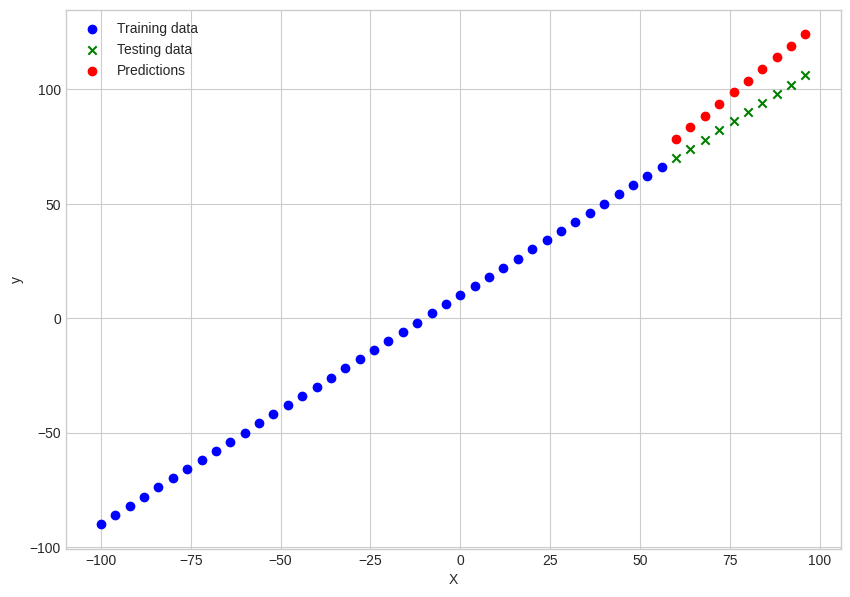

In [ ]:
# Plot the model 2 results
y_preds_2 = model_2.predict(X_test)
plot_predictions(y_preds_2)

In [ ]:
# Caluclate model_2 evaluation metrics
mae_2 = mae(y_test, tf.squeeze(y_preds_2))
mse_2 = mse(y_test, tf.squeeze(y_preds_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.193423>,
 <tf.Tensor: shape=(), dtype=float32, numpy=184.02426>)

In [ ]:
tf.random.set_seed(42)
# Make the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape= [1]),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])
# Fit the data
model_3.fit(X_train, y_train, epochs = 500, verbose=0)


1/1 [==============================] - 0s 52ms/step


<Figure size 1000x700 with 0 Axes>

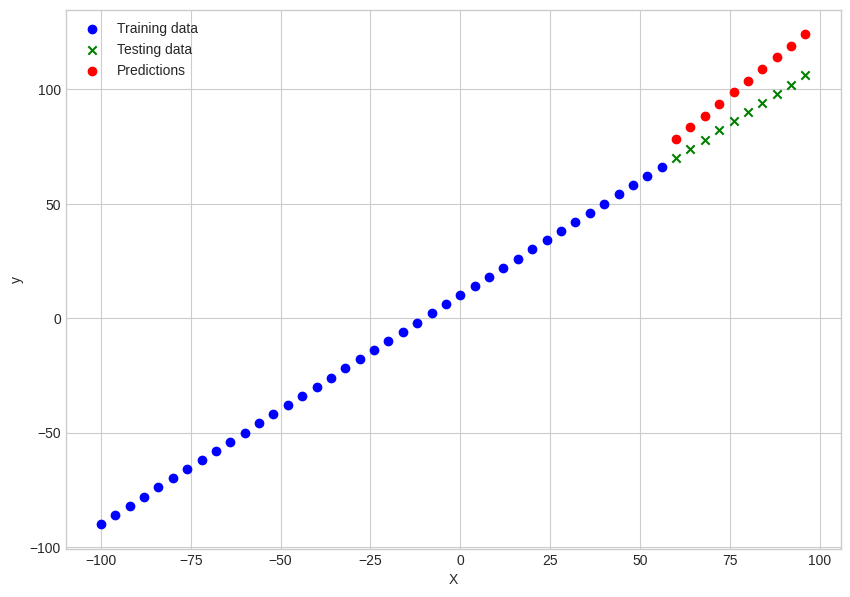

In [ ]:
# Plot the model 3 results
y_preds_3 = model_3.predict(X_test)
plot_predictions(y_preds_3)

In [ ]:
# Caluclate model_3 evaluation metrics
mae_3 = mae(y_test, tf.squeeze(y_preds_3))
mse_3 = mse(y_test, tf.squeeze(y_preds_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.21210022>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.04614983>)

🔑**Note:** You want to start with small experiments(Small models) and make sure they work and then increase their scale when necessary.

## Comparing the resilts of our experiments
We've run a few experiments, let's compare the results.

In [ ]:
# let's compare our models results using a pandas DataFrame
import pandas as pd
model_results =[["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "MAE", "MSE"])
all_results

,model,MAE,MSE
0,model_1,32.603230,1075.382568
1,model_2,13.193423,184.024261
2,model_3,0.212100,0.046150


Looks like the model_3 performed the best

In [ ]:
model_3.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 100)               200       
                                                                 
 dense_30 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🔑**Note:** One of your main goals should be to minimize the time between the experiments. The more experiments you do, the more things you'll figure out' which don't work and in turn, get closer to figure out what does work. Remember the machine learning practicioner's motto: "experiment", "experiment", "experiment"

## Tracking you're experiments

One really good habit in machine learning modelling is to track the results of your experiments;

And when doing so, it can be tedious if you're running lots of experiments.

Luckily there are tools to help us:
As you build more models, you'll want to look into using:
* TensorBoard - a comonent of the TensorFlow library to help track modeling experiments (We'll wee this one later)
* Weights & biases - a tool for tracking all kinds of machine learning experiments (plugs straights into TensorBoard)


## Saving our models

saving our models allows us to use them outside the Google Colab (or wherever they wete trained) such as in a web application or a mobile app

There are 2 main formats to save our model

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save the model with SavedModel format
model_3.save("best_model_SavedModel_format")

In [ ]:
# Save the model using the HDF5 format
model_3.save("model_3_HDF5.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saved model


In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 100)               200       
                                                                 
 dense_30 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_3 predictions with savedmodel format model predictions
model_3_preds = model_3.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_3_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 53ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model_3_preds, loaded_SavedModel_format_preds

(array([[ 70.15866 ],
        [ 74.17053 ],
        [ 78.18241 ],
        [ 82.19429 ],
        [ 86.20616 ],
        [ 90.21805 ],
        [ 94.22993 ],
        [ 98.24179 ],
        [102.253654],
        [106.265526]], dtype=float32),
 array([[ 70.15866 ],
        [ 74.17053 ],
        [ 78.18241 ],
        [ 82.19429 ],
        [ 86.20616 ],
        [ 90.21805 ],
        [ 94.22993 ],
        [ 98.24179 ],
        [102.253654],
        [106.265526]], dtype=float32))

In [ ]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [ ]:
mae(y_true = y_test, y_pred = model_3_preds) == mae(y_true=y_test, y_pred = loaded_SavedModel_format_preds)

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [ ]:
model_3_preds.squeeze()

array([ 70.15866 ,  74.17053 ,  78.18241 ,  82.19429 ,  86.20616 ,
        90.21805 ,  94.22993 ,  98.24179 , 102.253654, 106.265526],
      dtype=float32)

In [ ]:
loaded_SavedModel_format_preds.squeeze()

array([ 70.15866 ,  74.17053 ,  78.18241 ,  82.19429 ,  86.20616 ,
        90.21805 ,  94.22993 ,  98.24179 , 102.253654, 106.265526],
      dtype=float32)

In [ ]:
# Loading a model using the hdf5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_h5_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 100)               200       
                                                                 
 dense_30 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check to see if the loaded .h5 model predictions match model_3
model_3_preds = model_3.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_3_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 80ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Downalod a model or any other file from google colab?

If you want to download your files from the google colab:

1. You can go to the "Files" tab and right click on the file you're after and click download
2. Use code (see the cell below).
3. Save it to Google Drive by connecting google drive and copying it there

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Download a file from the Google Colab
from google.colab import files
files.download("/content/model_3_HDF5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (Requiers mounting google drive)
!cp /content/model_3_HDF5.h5 #next in this line the model you want to copy to
!ls # For listing the dirs in the file


cp: missing destination file operand after '/content/model_3_HDF5.h5'
Try 'cp --help' for more information.
best_model_SavedModel_format  drive  model_3_HDF5.h5  model.png  sample_data


## A larger example

In [ ]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
# Let's try one_hot_encode our dataframe so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X and y values (feature and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
161,18,36.850,0,1,0,0,1,0,0,1,0
981,34,21.375,0,0,1,1,0,1,0,0,0
1195,19,27.930,3,1,0,1,0,0,1,0,0
942,18,40.185,0,1,0,1,0,1,0,0,0
305,29,33.345,2,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
261,20,26.840,1,1,0,0,1,0,0,1,0
581,19,30.590,0,0,1,1,0,0,1,0,0
1164,41,28.310,1,1,0,1,0,0,1,0,0
72,53,28.100,3,1,0,1,0,0,0,0,1


In [ ]:
#training_ratio = 0.8

#train_size = int(len(X) * training_ratio)
#test_size = len(X) - train_size

#X_train, X_test = tf.split(X, [train_size, test_size])
#y_train, y_test = tf.split(y, [train_size, test_size])

In [ ]:
#X_train

In [ ]:
tf.random.set_seed(42)
# Building a neural network
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compiling the model
insurance_model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# Fit the data
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 12913.3027 - mae: 12913.3027
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12068.5010 - mae: 12068.5010
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 11242.0039 - mae: 11242.0039
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 10486.2676 - mae: 10486.2676
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 9839.7852 - mae: 9839.7852
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9293.0029 - mae: 9293.0029
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8822.0615 - mae: 8822.0615
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 8439.3633 - mae: 8439.3633
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 8136.4438 - mae: 8136.4438
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7894.8037 - mae: 7

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7000.0220 - mae: 7000.0220


[7000.02197265625, 7000.02197265625]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it seem's like out model isn't perfomaing too well... letn's try to improve our model

To (Try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and ise the Adam optimizer
2. Train for longer
3. (change the learning rate)

In [ ]:
insurance_model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 1)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Sset random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs = 100, verbose=1)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13289.5693 - mae: 13289.5693
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13120.0039 - mae: 13120.0039
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12771.2285 - mae: 12771.2285
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12087.6699 - mae: 12087.6699
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10949.1230 - mae: 10949.1230
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9505.8184 - mae: 9505.8184
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8184.5952 - mae: 8184.5952
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7545.6436 - mae: 7545.6436
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7437.1792 - mae: 7437.1792
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7416.2319 - mae:

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4956.9180 - mae: 4956.9180


[4956.91796875, 4956.91796875]

In [ ]:
# Checking the MAE of the first model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7000.0220 - mae: 7000.0220


[7000.02197265625, 7000.02197265625]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(0.01),
                          metrics=["mae"])
# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs = 200)


Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 11855.6641 - mae: 11855.6641
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 7504.7246 - mae: 7504.7246
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7295.7539 - mae: 7295.7539
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7073.4336 - mae: 7073.4336
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 6846.6084 - mae: 6846.6084
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6571.1074 - mae: 6571.1074
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 6447.0869 - mae: 6447.0869
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 6265.2363 - mae: 6265.2363
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 6138.0229 - mae: 6138.0229
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 5967.4917 - mae: 5967.49

In [ ]:
# Evaluate the third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3183.0576 - mae: 3183.0576


[3183.0576171875, 3183.0576171875]

Text(0.5, 0, 'apochs')

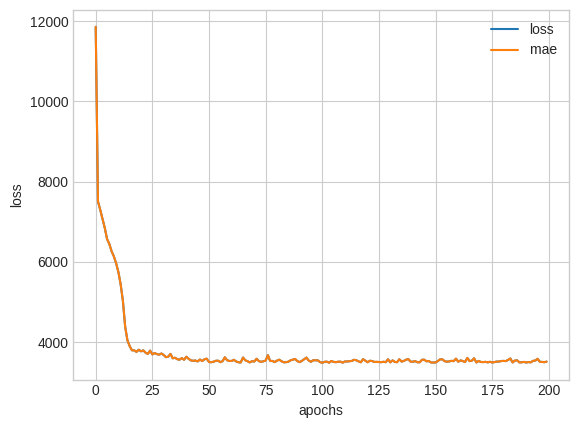

In [ ]:
# Plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("apochs")

>  **Question:** How long should you train for?
It depends. Really... it depends on the problem youre working on. However, man people have asked this question before... so Tensorflow has a solution! It's calles the EarlyStopping Callback which is a tensor flow component you can add to youre model to stop training once it stops improving a certain metrics.


## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure which to use you can try both and see which performs better.

OneHotEncoding for the object values and Normalization or standardization for numeric values

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance DataFrame
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data we can borrow a few classes from Scikit-Learn

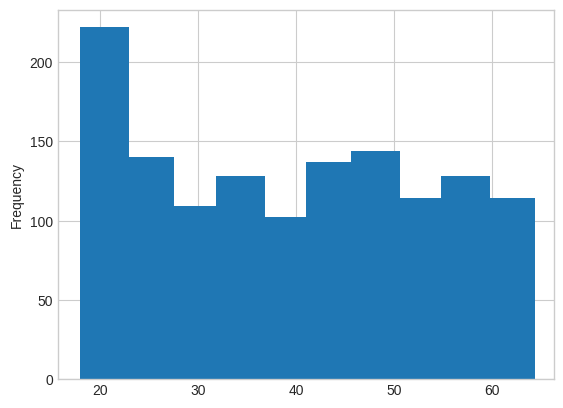

In [ ]:
X["age"].plot(kind="hist", width=5);

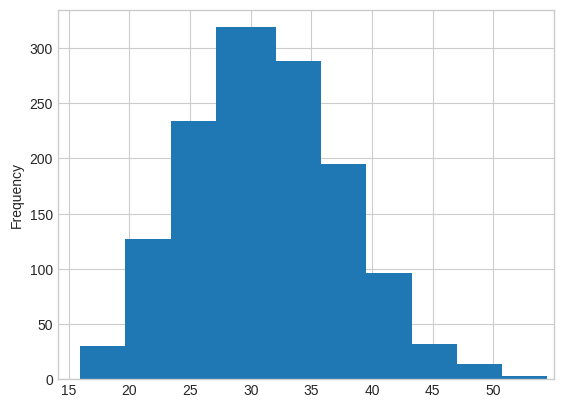

In [ ]:
X["bmi"].plot(kind="hist", width=5);

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore") , ["sex","smoker","region"])
)

# Create X & y
X = insurance.drop("charges", axis= 1)
y = insurance["charges"]

# Build our train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder.
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train_normal[1]

array([0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train.shape, X_train_normal.shape # Because of the onehotencoding process it added more demintion

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded.
Noe let's build a neural network model on it and see how it goes.

In [ ]:
tf.random.set_seed(42)
# Build a neural network model to fit on our normalized data
insurance_model_4= tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["mae"])
# Fit the data
history = insurance_model_4.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13344.1855 - mae: 13344.1855
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13338.5459 - mae: 13338.5459
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13323.2070 - mae: 13323.2070
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13288.9922 - mae: 13288.9922
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13226.0234 - mae: 13226.0234
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13124.4971 - mae: 13124.4971
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12974.4590 - mae: 12974.4590
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12766.3154 - mae: 12766.3154
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12490.9346 - mae: 12490.9346
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 12141.54

In [ ]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3386.1082 - mae: 3386.1082


[3386.108154296875, 3386.108154296875]

Text(0.5, 0, 'epochs')

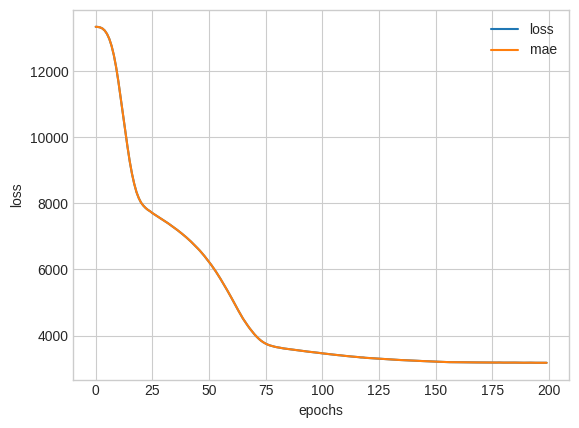

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")